# Reference:

https://blog.keras.io/building-autoencoders-in-keras.html

# Autoencoder (Simple)

(60000, 784)
(10000, 784)
Epoch 1/5
235/235 [==============================] - 4s 15ms/step - loss: 0.2811 - val_loss: 0.2367
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.2135 - val_loss: 0.1932
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1808 - val_loss: 0.1677
Epoch 4/5
235/235 [==============================] - 5s 19ms/step - loss: 0.1591 - val_loss: 0.1492
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


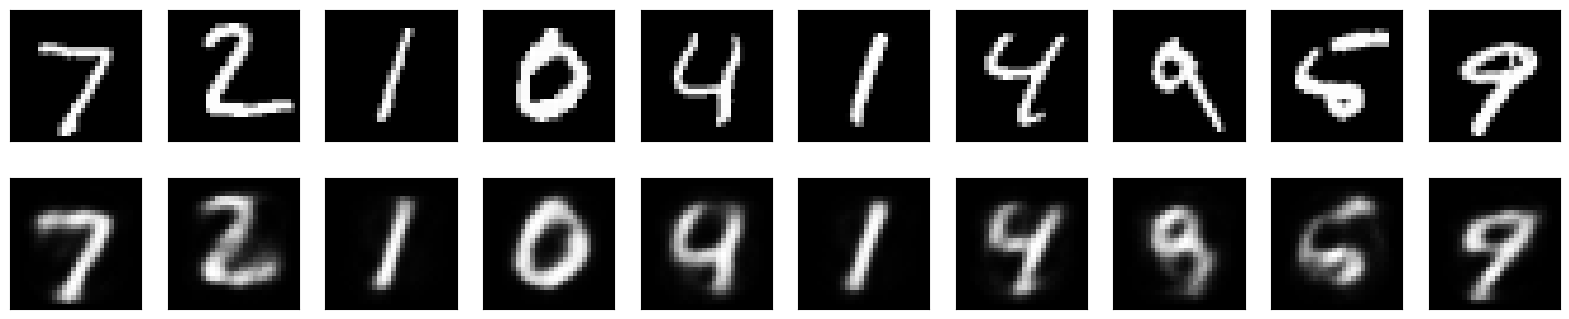

In [ ]:
import numpy as np
import keras
from keras import layers
from keras.datasets import mnist
# from keras.models import Model
# from keras.layers import Input, Dense
# from keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='sigmoid')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

import matplotlib.pyplot as plt

encoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder (from Reference)

(60000, 784)
(10000, 784)
Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.2754 - val_loss: 0.1857
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1678 - val_loss: 0.1524
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1436 - val_loss: 0.1331
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1279 - val_loss: 0.1202
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1172 - val_loss: 0.1116
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1100 - val_loss: 0.1056
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1048 - val_loss: 0.1015
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0987 - val_loss: 0.0964
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


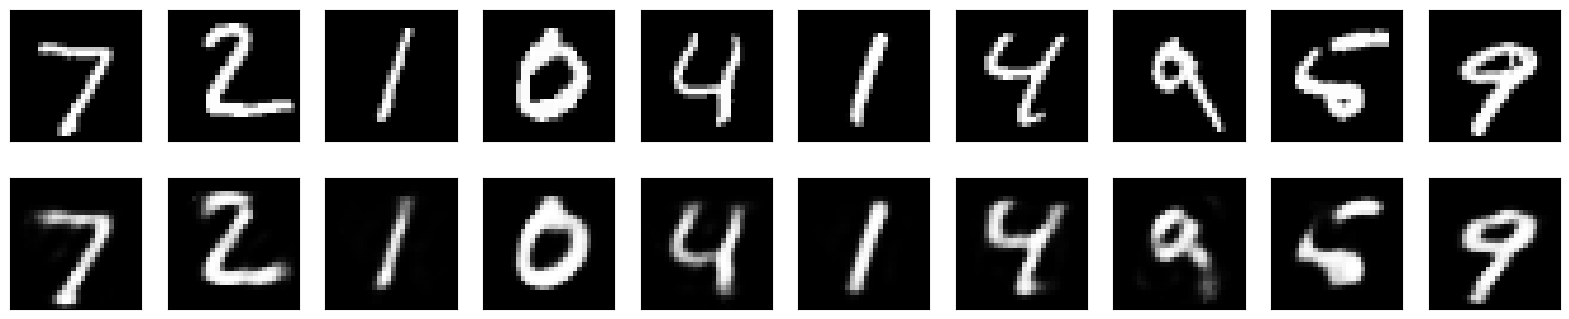

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding Sparsity (from Reference)


(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.2831 - val_loss: 0.1987
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1794 - val_loss: 0.1619
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1527 - val_loss: 0.1429
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1384 - val_loss: 0.1319
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1290 - val_loss: 0.1239
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1223 - val_loss: 0.1182
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1174 - val_loss: 0.1142
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1138 - val_loss: 0.1111
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - lo

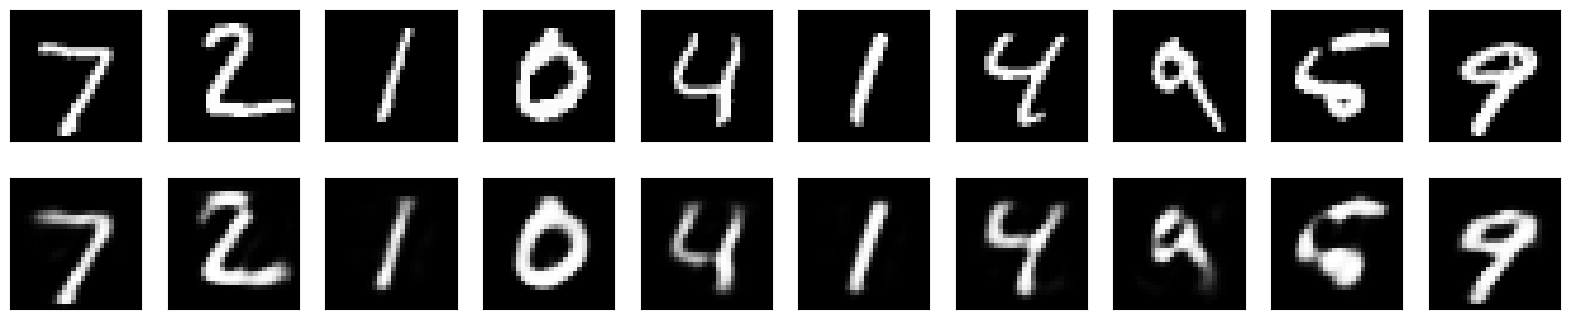

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Adding noise (from Reference)

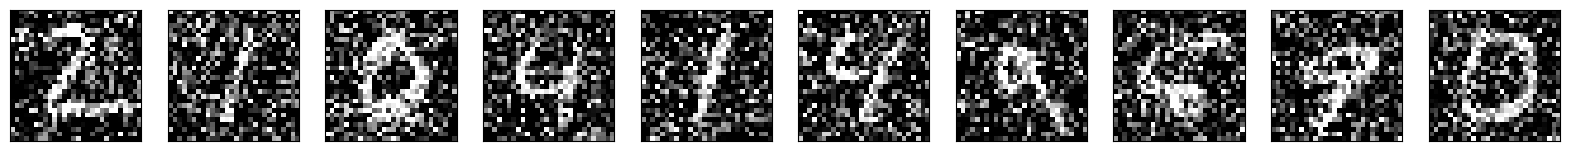

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising Autoencoder

(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.2885 - val_loss: 0.2279
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1987 - val_loss: 0.1785
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1707 - val_loss: 0.1613
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1566 - val_loss: 0.1501
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1467 - val_loss: 0.1418
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1402 - val_loss: 0.1365
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1358 - val_loss: 0.1331
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1330 - val_loss: 0.1309
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1311 - val_loss: 0.1293
Epoch 10/20
235/235 [==============================] - 2s 10ms/step - lo

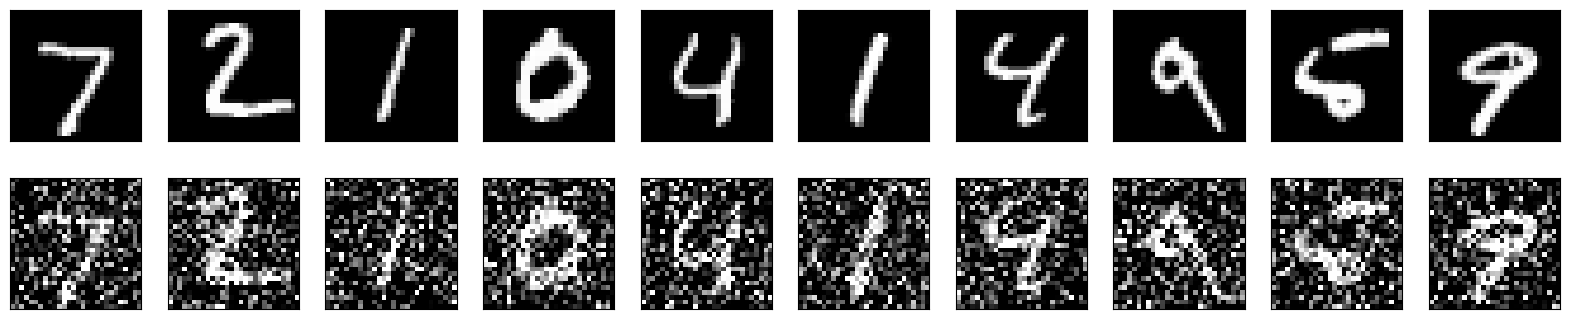

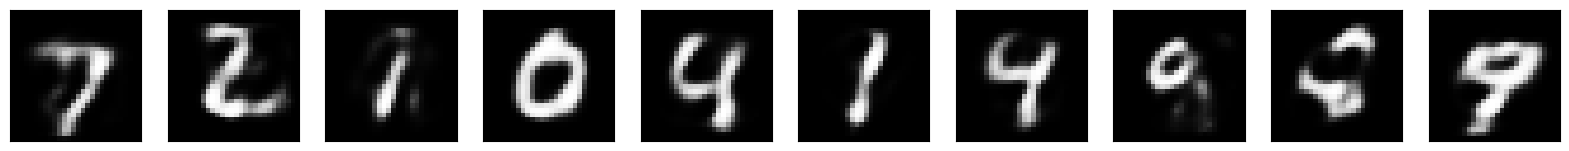

In [ ]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Function to add noise to the images
# ALT: Can also use GaussianNoise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Keep values in [0, 1]
    return noisy_images

# Add noise to the training and testing data
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Train the autoencoder using the noisy images as input and the original images as output
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib to visualize the results
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy input
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Display reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display reconstruction
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
